# Boston Housing Price Prediction

This is a Machine Learning project to predict the price houses in Boston. It uses Linear Regression model to perform the predictions. The Boston Housing dataset has been downloaded from the [UCI Repository](https://archive.ics.uci.edu/ml/datasets/Housing).

In [6]:
'''
Import the libraries to be used in the project.
'''

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [7]:
'''
Helper functions.
'''

def draw_heatmap(data, figsize=(10, 10)):
    '''
    Draws a correlation heatmap.
    '''
    
    correlation_matrix = data.corr().round(2)
    plt.figure(figsize=figsize)
    sns.heatmap(data=correlation_matrix, annot=True)
    return None

    
def evaluate(model, X, Y, method):
    '''
    Evaluates the model on input data X and target data Y.
    '''
    
    predictions = model.predict(X)
    rmse = np.sqrt(mean_squared_error(Y, predictions))
    r2 = r2_score(Y, predictions)
    print(f'Evaluation stats for {method} data')
    print(f'RMSE: {rmse}, R2: {r2}')
    return None

In [9]:
'''
Load the dataset.
'''

boston = pd.read_csv('datasets/boston_housing.csv')
points, variables = boston.shape
boston

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


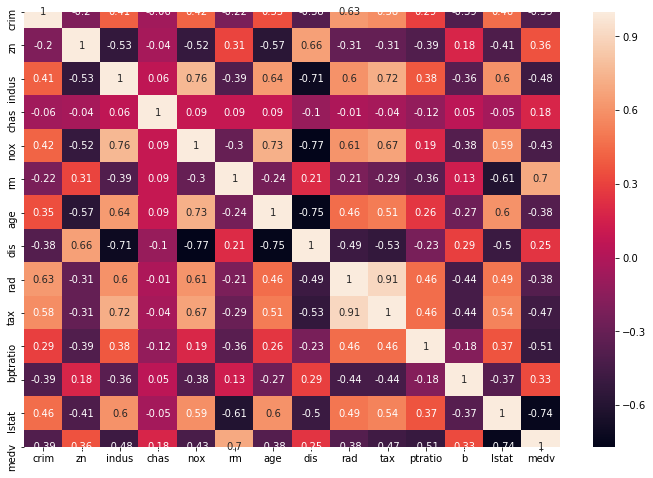

In [10]:
'''
Find the relation among different features of the dataset.
We check what features are mostly related with the target variable `medv`.
'''

draw_heatmap(boston, figsize=(12,8))

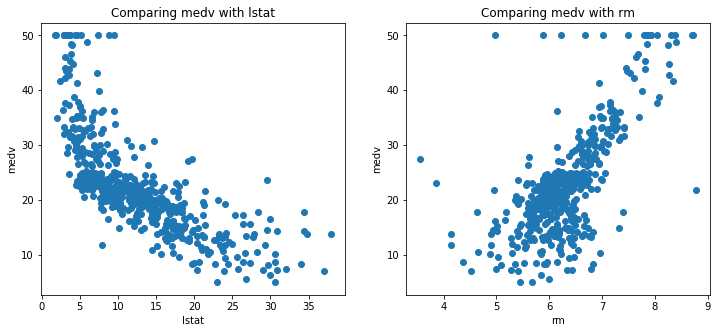

In [12]:
'''
Graphically checking the relation between most coorelated features with `medv` variable.
'''

plt.figure(figsize=(12, 5))

features = ['lstat', 'rm']
target = boston['medv']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(f'Comparing medv with {col}')
    plt.xlabel(col)
    plt.ylabel('medv')

In [13]:
'''
Split the data into training and testing samples.
'''

X = boston[features]
Y = boston['medv']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
print(f'Training input symbols:  {X_train.shape}')
print(f'Testing input symbols:   {X_test.shape}')
print(f'Training target symbols: {Y_train.shape}')
print(f'Testing target symbols:  {Y_test.shape}')

Training input symbols:  (404, 2)
Testing input symbols:   (102, 2)
Training target symbols: (404,)
Testing target symbols:  (102,)


In [14]:
'''
Create a linear regression model.
'''

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [15]:
'''
Evaluate the model.
'''

evaluate(model, X_train, Y_train, 'training')
evaluate(model, X_test, Y_test, 'testing')

Evaluation stats for training data
RMSE: 5.2903630485515345, R2: 0.6363353379616082
Evaluation stats for testing data
RMSE: 6.434440411684905, R2: 0.604114273522912
